# World Happiness Report

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data=pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\GitHub\DSData\happiness_score_dataset.csv")

In [7]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# There are 158 rows and 12 columns

In [8]:
data.drop(['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'],axis=1,inplace=True)

# Visualization

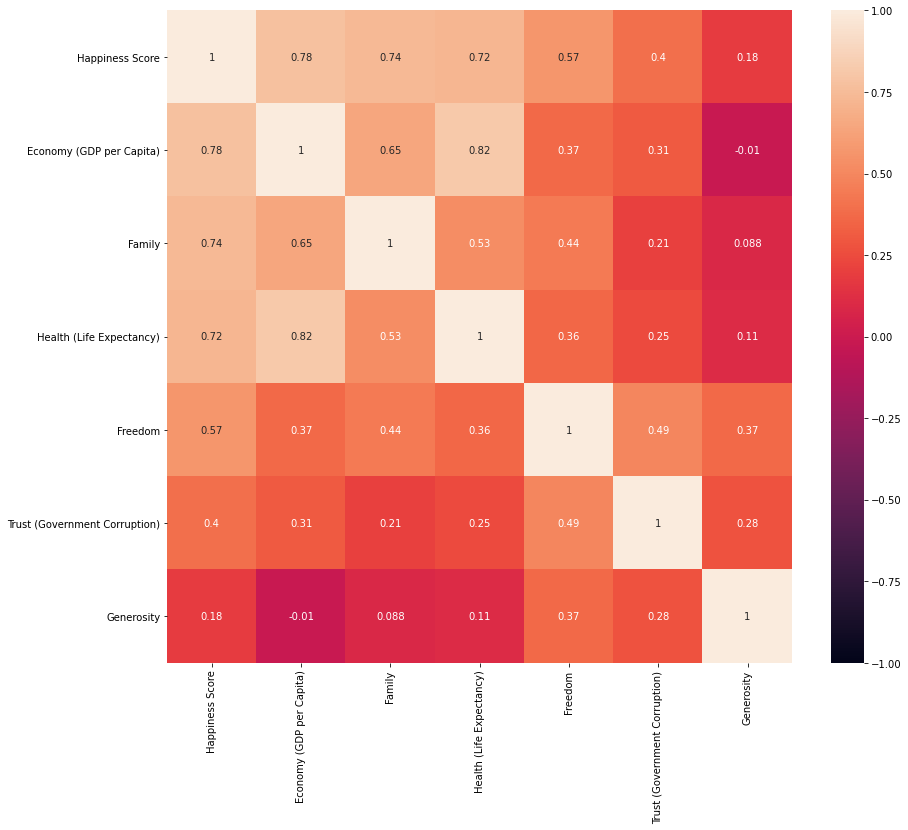

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),annot=True,vmin=-1.0,vmax=1.0)
plt.show()

### All the data show strongly positve co-relation. 

In [15]:
data.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

###  there is no missing values and the data set are clean.

In [17]:
y=data['Happiness Score']
X=data.drop('Happiness Score',axis=1)

In [18]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [20]:
Scaler=MinMaxScaler()
X=pd.DataFrame(Scaler.fit_transform(X),columns=X.columns)

In [21]:
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895
1,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198
2,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947
3,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983
4,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602
...,...,...,...,...,...,...
153,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314
154,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432
155,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790
156,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864


In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [32]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [33]:
print(f"Regression R2:{model.score(X_test,y_test)}")

Regression R2:0.8032007980150032


### the score value is 0.80 and the data around the regression line is pretty closely fit towards the regression line. 

In [68]:
data.to_csv(r"C:\Users\DELL\OneDrive\Documents\GitHub\world_happiness.csv")